# GradBoost Model

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])

# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])

In [4]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


### X,y division

In [5]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]

X_small_file = small_file.iloc[:, 0:44]

In [6]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]

y_small_file = small_file.iloc[:, 44]


In [7]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [8]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Normalisation?

In [9]:
# Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_players_all_normalized = scaler.fit_transform(X_players_all)
X_players_ranked_normalized =  scaler.fit_transform(X_players_ranked)
X_players_pro_normalized = scaler.fit_transform(X_players_pro)
X_small_file_normalized = scaler.fit_transform(X_small_file)

X_players_all_normalized = pd.DataFrame(X_players_all_normalized, columns=X_players_all.columns)
X_players_ranked_normalized = pd.DataFrame(X_players_ranked_normalized, columns=X_players_ranked.columns)
X_players_pro_normalized = pd.DataFrame(X_players_pro_normalized, columns=X_players_pro.columns)
X_small_file_normalized = pd.DataFrame(X_small_file_normalized, columns=X_small_file.columns)

In [10]:
# Z-score for teams
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_teams_all_normalized = scaler.fit_transform(X_teams_all)
X_teams_ranked_normalized =  scaler.fit_transform(X_teams_ranked)
X_teams_pro_normalized = scaler.fit_transform(X_teams_pro)

X_teams_all_normalized = pd.DataFrame(X_teams_all_normalized, columns=X_teams_all.columns)
X_teams_ranked_normalized = pd.DataFrame(X_teams_ranked_normalized, columns=X_teams_ranked.columns)
X_teams_pro_normalized = pd.DataFrame(X_teams_pro_normalized, columns=X_teams_pro.columns)

In [11]:
X_players_ranked_normalized.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_offensive_third,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball
0,-0.244786,-0.006564,-0.105950,-0.028138,0.536498,0.210515,0.345503,0.088237,0.262826,0.215025,...,-2.540903,-1.018220,2.796536,-2.796536,0.839287,-0.839287,-0.364511,-0.855038,1.348097,-1.015858
1,-0.864632,-0.373041,-0.027812,-0.758952,0.873504,0.984698,-0.750224,-0.864637,-0.613178,-1.117797,...,-1.971989,-1.597289,2.192010,-2.192010,-0.759975,0.759975,-0.497711,0.621517,-0.427544,-0.227942
2,-1.452418,-0.477431,-0.355434,-0.857818,1.267432,0.003658,0.408733,0.966403,0.003394,-0.907351,...,-2.304965,-1.158523,2.380453,-2.380453,-0.729034,0.729034,0.502915,-0.122149,-1.340359,0.848635
3,-0.383717,-0.070282,-0.027254,-0.445694,0.808337,0.517473,-0.419809,1.273691,-0.545793,-0.451386,...,2.113161,-0.214666,-1.652232,1.652232,1.137094,-1.137094,-0.972034,1.952572,1.687142,-0.872435
4,0.289565,0.172737,0.445481,0.232608,0.082456,0.781302,-0.247855,-0.764557,-1.310612,-1.047648,...,0.370265,1.190915,-0.526095,0.526095,1.579936,-1.579936,-0.741370,-0.544279,-0.718776,0.116999


### Train-test split

In [12]:
from sklearn.model_selection import train_test_split
import sklearn
print(f"sklearn version: {sklearn.__version__}")

sklearn version: 1.1.3


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_teams_all_normalized, y_teams_all, random_state=20, test_size=0.4)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=20, test_size=0.5)

## Model

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
gbr = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10
)

In [17]:
# next is 1 min / met parameters meer dan 17 min / now is 6 min / 14 min

In [18]:
gbr.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_split=10, n_estimators=500)

### metrics

In [19]:
# next is 2 min / met parameter meer dan 63 min n_jobs=1 / n_jobs=-1 zou 6 x zo snel moeten gaan dan / now is 10 min

In [20]:
cross_val_score(gbr, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7595307917888564

In [21]:
y_pred = gbr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = gbr.predict(X_test)
y_pred_classes = y_pred
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7662709197539694


In [24]:
gbr.score(X_test, y_test)

0.7662709197539694

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.76      0.76      6957
        True       0.76      0.77      0.77      7025

    accuracy                           0.77     13982
   macro avg       0.77      0.77      0.77     13982
weighted avg       0.77      0.77      0.77     13982



In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7662709197539694
recall 0.7722419928825622
precision 0.7648385732412237
f1 0.7685224536053263


### Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
print(confusion_matrix(y_test, y_pred))

[[5289 1668]
 [1600 5425]]


[[5289 1668]
 [1600 5425]]
0.7662709197539694


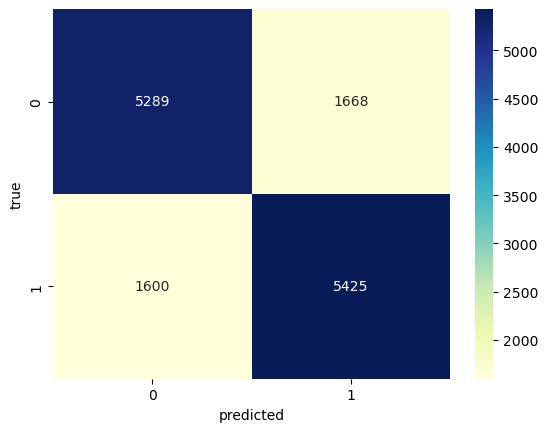

In [31]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.77175953 0.10773547 0.63841424 0.1822796  0.67589313 0.11725837
 0.10527762 0.03623997 0.01775638 0.04284788 0.71865387 0.57915628
 0.64212824 0.51699725 0.24423054 0.77817521 0.97726284 0.51645834
 0.29257158 0.87715371 0.03335954 0.75608528 0.10277045 0.21346279
 0.58832331 0.09971394 0.04042386 0.63128905 0.18311988 0.68633731
 0.71343826 0.52224511 0.21919493 0.07312978 0.11253239 0.06767918
 0.78696972 0.63778932 0.29090167 0.1102902  0.28499264 0.07920879
 0.82240044 0.88284383 0.92186632 0.40851309 0.63799672 0.39052744
 0.81448248 0.61306772 0.93623015 0.39164602 0.31296379 0.98358214
 0.60174881 0.05588182 0.07995105 0.90591577 0.37859102 0.33430921
 0.31340118 0.77153107 0.87138169 0.12241262 0.04721546 0.26889064
 0.73380183 0.7361468  0.11940679 0.07290069 0.0928931  0.1685745
 0.72676089 0.93670563 0.43484392 0.53319205 0.60036644 0.17064457
 0.46802721 0.50307019 0.04389964 0.85636592 0.85025328 0.70448508
 0.16364571 0.9537067  0.48851739 0.01778702 0.05090645 0.97398

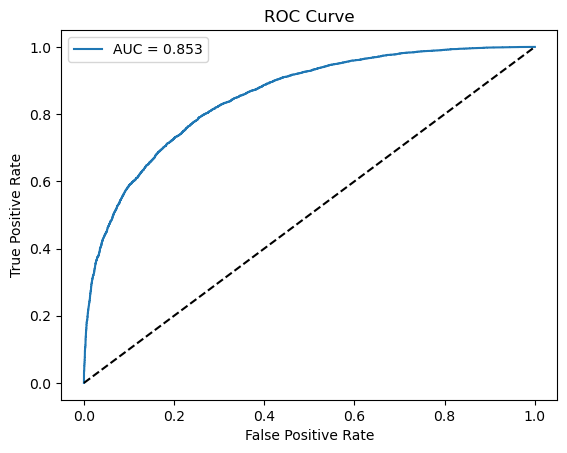

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [33]:
features = pd.DataFrame(gbr.feature_importances_, index = X_train.columns)

In [34]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_infront_ball,0.389936
avg_positioning_percent_behind_ball,0.272061
avg_positioning_time_front_of_ball,0.021208
avg_positioning_avg_distance_to_ball_possession,0.013500
min_positioning_percent_infront_ball,0.010717
...,...
movement_avg_speed_percentage_1,0.000254
min_positioning_percent_closest_to_ball,0.000250
positioning_percent_infront_ball_2,0.000229
min_positioning_percent_behind_ball,0.000088


# Model 2 -------------------------------------------------

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbr2 = GradientBoostingClassifier(
    n_estimators=500,
    min_samples_split=10,
    learning_rate= 0.1,
    max_depth=7
)

In [37]:
# next is 1 min / now depth=7 is 16 min / depth=9 24 min / 30 min

In [38]:
gbr2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_split=10, n_estimators=500)

### metrics

In [39]:
# next is 2 min / 11 min / 24 min

In [40]:
cross_val_score(gbr2, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7588393772500774

In [41]:
y_pred2 = gbr2.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
y_pred2 = gbr2.predict(X_test)
y_pred_classes = y_pred2
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7671291660706623


In [44]:
gbr2.score(X_test, y_test)

0.7671291660706623

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.77      0.76      0.77      6957
        True       0.77      0.77      0.77      7025

    accuracy                           0.77     13982
   macro avg       0.77      0.77      0.77     13982
weighted avg       0.77      0.77      0.77     13982



In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [48]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7671291660706623
recall 0.7698220640569395
precision 0.7674187597559246
f1 0.7686185332575327


### Confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
print(confusion_matrix(y_test, y_pred2))

[[5318 1639]
 [1617 5408]]


[[5318 1639]
 [1617 5408]]
0.7671291660706623


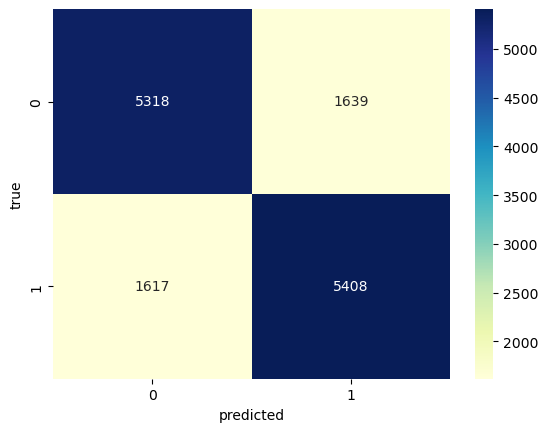

In [51]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

[0.68944136 0.0326134  0.41365152 0.07809923 0.81412513 0.03381797
 0.05567842 0.01789889 0.00422165 0.01293763 0.90855507 0.48912621
 0.59255507 0.73820209 0.05407543 0.85517075 0.98637291 0.61494221
 0.06895044 0.97468152 0.02042291 0.76719569 0.06819521 0.11069727
 0.59502514 0.18389567 0.03349016 0.89028492 0.09316008 0.27934144
 0.71426981 0.56850795 0.26770927 0.08464104 0.06457825 0.0367045
 0.91222701 0.47338175 0.41099901 0.03430856 0.19211933 0.03251076
 0.83086838 0.94244984 0.98035578 0.18554915 0.71686173 0.21642524
 0.9381246  0.83177162 0.98074005 0.2866034  0.46973701 0.9956071
 0.46025887 0.03240727 0.05407502 0.95123394 0.26375563 0.47796724
 0.26158795 0.75812373 0.92802214 0.07424226 0.02144565 0.12782171
 0.95287226 0.91424753 0.09916227 0.04422547 0.04238412 0.08261465
 0.62397465 0.98078042 0.32424386 0.52389584 0.79167621 0.17278188
 0.60268163 0.6492545  0.00771842 0.95161039 0.94813299 0.74054737
 0.11168602 0.96317    0.84074679 0.00415341 0.02626724 0.990131

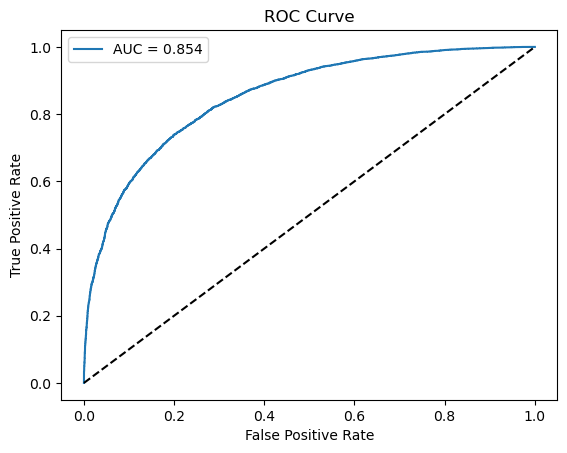

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = gbr2.predict_proba(X_test)[:, 1]
print(y_pred_proba[:100]) 

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### features

In [53]:
features = pd.DataFrame(gbr2.feature_importances_, index = X_train.columns)

In [54]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_behind_ball,0.211567
avg_positioning_percent_infront_ball,0.161662
avg_positioning_avg_distance_to_ball_possession,0.010328
avg_positioning_time_front_of_ball,0.010115
avg_positioning_avg_distance_to_ball_no_possession,0.007842
...,...
movement_avg_speed_percentage_3,0.001179
movement_avg_speed_3,0.001112
movement_avg_speed_1,0.001104
movement_avg_speed_2,0.000975
